In [1]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e

add /home/ali/miniconda/lib/python3.8/site-packages to PYTHONPATH
python version: 3.8.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /home/ali/miniconda


PREFIX=/home/ali/miniconda
Unpacking payload ...


Solving environment: ...working... done

## Package Plan ##

  environment location: /home/ali/miniconda

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py39h7f8727e_0
    - conda==4.12.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.21=pyhd3eb1b0_0
    - pyopenssl==22.0.0

done
installing rdkit, openmm, pdbfixer
added conda-forge to channels


installation finished.


added omnia to channels


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/ali/miniconda

  added / updated specs:
    - openmm
    - pdbfixer
    - python==3.8.10
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    boost-1.74.0               |   py38hc10631b_3         368 KB  conda-forge
    boost-cpp-1.74.0           |       h312852a_4        16.3 MB  conda-forge
    bottleneck-1.3.4           |   py38hce1f21e_0         127 KB
    brotli-1.0.9               |       he6710b0_2         375 KB
    brotlipy-0.7.0             |py38h27cfd23_1003         323 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    cairo-1.16.0 

boost-cpp-1.74.0     | 16.3 MB   | ########## | 100% 
kiwisolver-1.4.2     | 83 KB     | ########## | 100% 
icu-68.1             | 11.8 MB   | ########## | 100% 
jpeg-9e              | 240 KB    | ########## | 100% 
libxcb-1.15          | 505 KB    | ########## | 100% 
munkres-1.1.4        | 13 KB     | ########## | 100% 
lz4-c-1.9.3          | 185 KB    | ########## | 100% 
ca-certificates-2022 | 124 KB    | ########## | 100% 
cycler-0.11.0        | 12 KB     | ########## | 100% 
zstd-1.5.2           | 488 KB    | ########## | 100% 
bzip2-1.0.8          | 78 KB     | ########## | 100% 
pycosat-0.6.3        | 82 KB     | ########## | 100% 
blas-1.0             | 6 KB      | ########## | 100% 
matplotlib-base-3.5. | 5.7 MB    | ########## | 100% 
libxml2-2.9.12       | 772 KB    | ########## | 100% 
lcms2-2.12           | 312 KB    | ########## | 100% 
libiconv-1.16        | 736 KB    | ########## | 100% 
python-dateutil-2.8. | 233 KB    | ########## | 100% 
pandas-1.4.2         | 9.9 M

done
conda packages installation finished!


In [4]:
import rdkit
import deepchem as dc
import pandas as pd
import numpy as np

In [8]:
PDBs = {}
from os import listdir
from os.path import isfile, join
mypath = '../Datasets/moobley-cd-set1/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for f in onlyfiles:
    if f.__contains__('guest'):
        PDBs.update({f.split('.')[0] : rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)})
experimental_data = {
    'guest-1': -1.575+2.17,
    'guest-2': -3.533+4.19,
    'guest-3': -4.606+5.46,
    'guest-4': -2.130+2.74,
    'guest-5': -2.510+2.99,
    'guest-6': -1.506+2.53,
    'guest-7': -3.380+3.40,
    'guest-8': -4.622+4.89,
    'guest-s9': -1.685+2.57,
    'guest-s10': -1.764+2.68,
    'guest-s11': -2.720+3.28,
    'guest-s12': -3.516+4.20,
    'guest-s13': -3.604+4.28,
    'guest-s14': -4.137+4.66,
    'guest-s15': -4.166+4.74,
    'guest-s16': -2.022+2.75,
    'guest-s17': -3.227+0.93,
    'guest-s18': -2.596+2.75,
    'guest-s19': -3.344+4.12,
    'guest-s20': -3.011+3.36,
    'guest-s21': -3.991+4.19,
    'guest-s22': -3.597+4.48
}
Guests = []
Y_exp = []
for e in experimental_data.keys():
    Guests.append(PDBs[e])
    Y_exp.append(experimental_data[e])
y_train = np.array(Y_exp[:11])
y_test = np.array(Y_exp[11:])

In [9]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)

X = []
for g in Guests:
    X.append(featurizer.featurize(g))

In [10]:
X = [x[0] for x in X]
X_train_featurized = X[:11]
X_test_featurized = X[11:]

In [20]:
addone_columns = ['Delta G', 'Bond', 'Idih', 'Tether']

In [21]:
pdb_res_path = '../Datasets/moobley-cd-set1/cd_set1_gaff_vcharge/CD/'
x_add = []
for g_name in experimental_data.keys():
    csv_path = pdb_res_path + 'CD_' + g_name + '/CD_' + g_name + '_vm2_single.csv'
    df = pd.read_csv(csv_path, skiprows=37)
    x_add.append(df.iloc[0][addone_columns].to_numpy())
x_add_train = x_add[:11]
x_add_test = x_add[11:]

In [22]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

x_preprocessed_train, x_preprocessed_test = [], []

## for X train
multiConvMol = ConvMol.agglomerate_mols(X_train_featurized)
x_preprocessed_train = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_train.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_train.append(np.array(x_add_train))

## for X test
multiConvMol = ConvMol.agglomerate_mols(X_test_featurized)
x_preprocessed_test = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_test.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_test.append(np.array(x_add_test))

In [23]:
x_train = np.full([14, np.max([v.shape[0] for v in x_preprocessed_train]),
                  np.max([v.shape[1] for v in x_preprocessed_train if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_train):
    if len(j.shape) > 1:
        x_train[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_train[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_train = x_train.reshape([1] + list(x_train.shape))

x_test = np.full([14, np.max([v.shape[0] for v in x_preprocessed_test]),
                  np.max([v.shape[1] for v in x_preprocessed_test if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_test):
    if len(j.shape) > 1:
        x_test[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_test[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_test = x_test.reshape([1] + list(x_test.shape))

In [50]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers


class GBGraphConvModel(tf.keras.Model):

  def __init__(self):
    super(GBGraphConvModel, self).__init__()
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)
    self.dense3 = layers.Dense(1, 
         bias_initializer=initializers.Zeros())

  def call(self, inputs):
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], input_shapes[i]))
    for i in range(1, len(input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [batch_size, 4])
    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])

    model_var = self.dense2(readout_output)
    binding_affinity = tf.concat([model_var, x_add], axis=1)
    return self.dense3(binding_affinity)
model = GBGraphConvModel()
model.compile(loss='mse', optimizer='adam')

In [51]:
batch_size = 11
input_shapes = [i.shape for i in x_preprocessed_train]

In [52]:
hist = model.fit(x_train, y_train.reshape([1, -1]), epochs=20)

Epoch 1/20


/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_2/graph_pool_13/Reshape_11:0", shape=(24,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_2/graph_pool_13/Reshape_10:0", shape=(24, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model_2/graph_pool_13/Cast_3:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_2/graph_pool_13/Reshape_14:0", shape=(94,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_2/graph_pool_13/Reshape_13:0", shape=(94, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_con

1/1 [==============================] - 4s 4s/step - loss: 9.9755
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 5.4346
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 3.2708
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 2.0457
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 1.1367
Epoch 6/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5741
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2970
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1747
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 0.1398
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1389
Epoch 11/20
1/1 [==============================] - 0s 7ms/step - loss: 0.1384
Epoch 12/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1398
Epoch 13/20
1/1 [==============================] - 0s 20ms/step - loss: 0.1401
Epoch 

In [31]:
import matplotlib.pyplot as plt

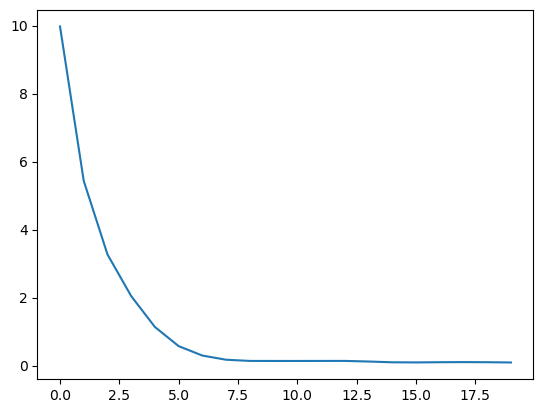

In [53]:
plt.plot(hist.history['loss'])

In [61]:
input_shapes = [i.shape for i in x_preprocessed_test]
model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 1s 704ms/step - loss: 3.3456


3.3456168174743652

In [57]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers


class GBGraphConvModel2(tf.keras.Model):

  def __init__(self):
    super(GBGraphConvModel2, self).__init__()
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)

  def call(self, inputs):
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], input_shapes[i]))
    for i in range(1, len(input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])

    model_var = self.dense2(readout_output)
    return model_var
model2 = GBGraphConvModel2()
model2.compile(loss='mse', optimizer='adam')

In [58]:
hist = model2.fit(x_train, y_train.reshape([1, -1]), epochs=20)

Epoch 1/20


/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model2_5/graph_pool_17/Reshape_11:0", shape=(24,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model2_5/graph_pool_17/Reshape_10:0", shape=(24, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model2_5/graph_pool_17/Cast_3:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model2_5/graph_pool_17/Reshape_14:0", shape=(94,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model2_5/graph_pool_17/Reshape_13:0", shape=(94, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_grap

1/1 [==============================] - 4s 4s/step - loss: 5.2224
Epoch 2/20
1/1 [==============================] - 0s 7ms/step - loss: 2.4524
Epoch 3/20
1/1 [==============================] - 0s 9ms/step - loss: 1.1095
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5513
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 0.2917
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1601
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1165
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.1086
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 0.1054
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1178
Epoch 11/20
1/1 [==============================] - 0s 9ms/step - loss: 0.1259
Epoch 12/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1194
Epoch 13/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1124
Epoch 1

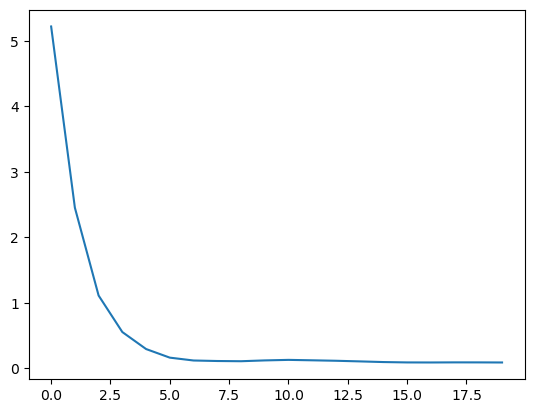

In [59]:
plt.plot(hist.history['loss'])

In [62]:
input_shapes = [i.shape for i in x_preprocessed_test]
model2.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 0s 19ms/step - loss: 0.7989


0.7988646030426025